In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from ppi_py.experiments import run
import pandas as pd

# Run Experiments

In [ ]:
# ns = [50, 100, 500]
# ps = [2, 10, 20, 50, 100, 200, 300, 350, 400, 500, 600, 800, 1000, 1400, 1450, 1500, 2000, 3000]

ns = [50, 100]
ps = [10, 50, 100, 200, 250, 300, 400, 500]

df = run(
    ns=ns, ps=ps,
    N = 300, num_trials=30,
    noise=1.0, sig=2.0, bet=0.0
)

df.to_csv("results/output_test.csv", index=False)

# Plots

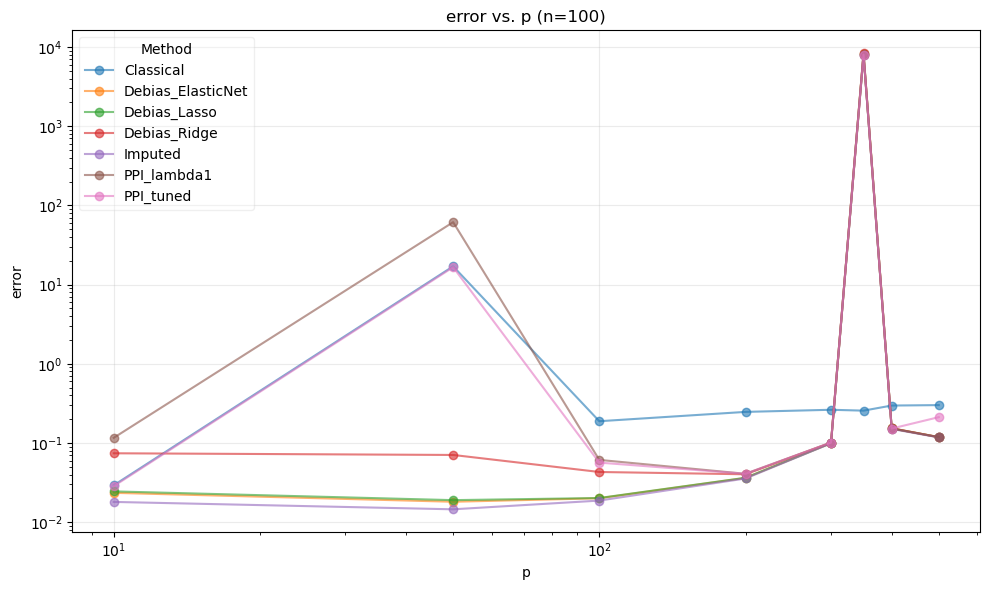

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("results/output.csv")
df = df[df["n"] == 50]
cat = "p"
note = "n=100" 
metric = "error"  # 原来叫 type，避免覆盖内置名

df_avg = df.groupby(["method", cat])[metric].mean().reset_index()

ALPHA_LINE   = 0.6  
ALPHA_GRID   = 0.25 
ALPHA_LEGEND = 0.3   

plt.figure(figsize=(10, 6))
for method in df_avg["method"].unique():
    subset = df_avg[df_avg["method"] == method]
    plt.plot(
        subset[cat], subset[metric],
        marker="o",
        label=method,
        alpha=ALPHA_LINE,     # ✨ 透明度在这里
    )

plt.title(f"{metric} vs. {cat} ({note})")
plt.xlabel(cat)
plt.ylabel(metric)
plt.yscale("log")
plt.xscale("log")
plt.grid(True, alpha=ALPHA_GRID)             # 网格也半透明
plt.legend(title="Method", framealpha=ALPHA_LEGEND)  # 图例背景半透明
plt.tight_layout()
plt.show()
